In [1]:
%pylab inline
from app.analysis import Quote
quote = Quote(Quote.screen_funds('Industries', max_expense=.6), 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-09-16 to 2019-11-22 - 65


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

48


,len,mean,std,skew,shrp,yield,drawdown
Symbols,,,,,,,
IHF,46,0.282543,0.603978,-0.550159,0.455978,13.371882,7.184780
SMH,46,0.192910,0.464135,0.356642,0.400244,8.117931,4.371046
IBB,46,0.178609,0.525736,-1.018677,0.326145,9.842474,7.810492
HACK,46,0.162568,0.399945,-0.539492,0.388616,8.469728,5.456883
IXN,46,0.161454,0.314598,-0.100334,0.490503,7.635695,3.695955
XLK,46,0.159100,0.320644,-0.198794,0.473911,7.287266,3.604371
IXJ,46,0.159059,0.296893,-0.422325,0.511686,8.419334,4.288247
SOXX,46,0.157756,0.486592,0.359818,0.309527,6.165754,5.315894
IYW,46,0.156792,0.326655,-0.316042,0.458126,7.410162,4.201884


evicted XT 0.898 0.100
evicted IYC 0.770 0.060
evicted VHT 0.882 0.102
evicted VAW 0.857 -0.024
evicted GNR 0.872 -0.174
evicted ITA 0.790 -0.177
evicted IGV 0.868 -0.346
evicted IBB 0.856 0.002
evicted KBE 0.595 0.057
evicted VDC 0.521 -0.077
evicted IHF 0.492 0.154
evicted IGF 0.391 -0.136
retry backlogs ['VFH', 'IYG', 'XLV', 'XLK', 'FHLC', 'IYJ', 'VGT', 'IYH', 'XLB', 'XLF', 'IXJ', 'FNCL', 'XLP', 'XLI', 'SOXX', 'FTEC', 'IGM', 'IHI', 'XLC', 'VOX', 'QTEC', 'RYT', 'IYW', 'PPA', 'IYF', 'KRE', 'VIS', 'SKYY', 'FBT', 'SMH', 'XBI', 'TDIV', 'HACK'] at 0.905/-0.51 - 0.684
evicted XLC 0.788 -0.136
evicted SKYY 0.881 -0.196
evicted PPA 0.864 -0.073
evicted IYF 0.905 0.181
evicted XLI 0.902 -0.008
evicted XBI 0.807 -0.184
evicted KRE 0.677 -0.066
evicted IXJ 0.662 0.122
evicted XLP 0.402 -0.173
retry backlogs ['VIS', 'IYJ', 'IXN', 'IYG', 'FTEC', 'FNCL', 'XLF', 'VFH', 'IYH', 'XLK', 'VOX', 'IHI', 'FHLC', 'SOXX', 'FBT', 'IGM', 'RYT', 'QTEC', 'XLB', 'VGT', 'HACK', 'TDIV', 'XLV', 'SMH'] at 0.910/-0.52

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown,skewness
Portfolio,46.0,0.144629,0.201159,-0.361474,0.006650,0.136544,0.293299,0.574912,0.683471,7.077903,2.001694,-0.065363
IXN,46.0,0.161454,0.314598,-0.593591,-0.087809,0.224999,0.349367,0.983326,0.490503,7.635695,3.695955,-0.100334
ITB,46.0,0.136962,0.339953,-0.707016,-0.086072,0.114066,0.338012,0.926221,0.381874,6.573402,4.083426,0.130922
CIBR,46.0,0.141955,0.382420,-0.670910,-0.116990,0.295542,0.466454,0.811734,0.352523,7.390210,4.843037,-0.528944


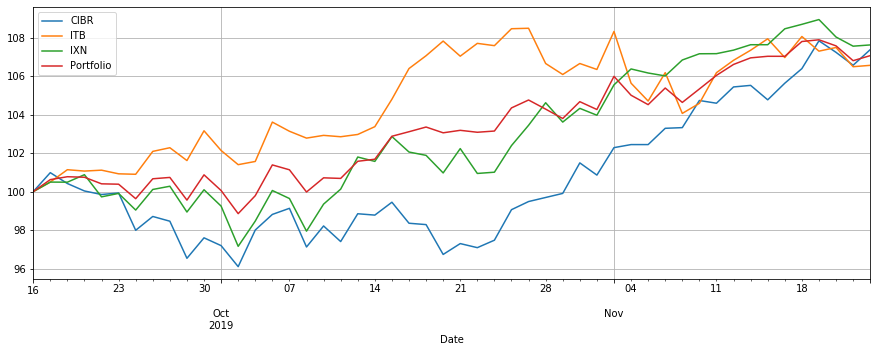

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['ITB', 'XLU'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown,skewness
Portfolio,46.0,0.144753,0.201258,-0.363781,0.005106,0.139246,0.295695,0.577865,0.683748,7.083214,2.007854,-0.075735
IXN,46.0,0.161454,0.314598,-0.593591,-0.087809,0.224999,0.349367,0.983326,0.490503,7.635695,3.695955,-0.100334
ITB,46.0,0.136962,0.339953,-0.707016,-0.086072,0.114066,0.338012,0.926221,0.381874,6.573402,4.083426,0.130922
CIBR,46.0,0.141955,0.382420,-0.670910,-0.116990,0.295542,0.466454,0.811734,0.352523,7.390210,4.843037,-0.528944


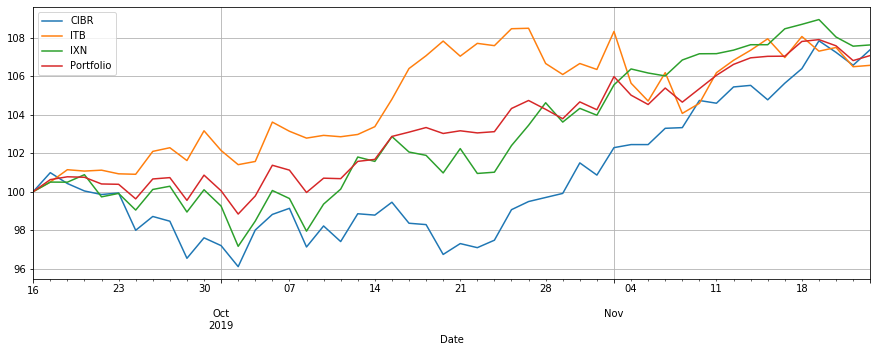

In [4]:
quote.setup_mask(['ITB', 'IXN', 'CIBR'])
quote.graph({'ITB': 0.46, 'IXN': 0.28, 'CIBR': 0.26})